# Covid-19 Data Analysis

This problem is focussed on data wrangling to generate insights, and subsequently do forecasting.

## Problem Definition

We need to identify the state-wise impact on Covid-19 in US.
Bonus points if solution is parameterised to run for any state independently and customisable duration-window taken for analysis.

## Expected output
* Please complete the tasks below in Jupyter Notebook by adding relevant code to complete the overall objective of this problem
* Please add relevant comments to make notebook more readable for the reviewer

## Remarks
* Programs should be written in Python 3.6 or above
* Any other information you might want to convey should be a part of this notebook

##### Note on Confidentiality
This problem is strictly confidential, and must not be shared and discussed publicly in any form.



### Task-1 Extracting and preprocessing data

#### Data Source
https://github.com/nytimes/covid-19-data

Take the data available for covid-19 for the US country from the mentioned link.

Perform relevant preprocessing steps on the extracted raw data to generate a dataframe containing, the date-wise numbers per state to get the number of:
* active cases
* deaths

Optionally, feel free to use any other data to generate this state-wise data for US.


In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
# loading the dataset and head of US states data
df_full= pd.read_csv('us-states.csv')
df_full.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
# tail (last few rows) of the dataset
df_full.tail()

,date,state,fips,cases,deaths
17884,2021-01-21,Virginia,51,459604,5940
17885,2021-01-21,Washington,53,300420,4131
17886,2021-01-21,West Virginia,54,112617,1849
17887,2021-01-21,Wisconsin,55,575688,6091
17888,2021-01-21,Wyoming,56,50424,550


In [5]:
# Info of the dataset
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    17889 non-null  object
 1   state   17889 non-null  object
 2   fips    17889 non-null  int64 
 3   cases   17889 non-null  int64 
 4   deaths  17889 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 698.9+ KB


In [6]:
# shape of the dataset
df_full.shape

(17889, 5)

In [7]:
# descriptive statistics of dataset
df_full.describe()

,fips,cases,deaths
count,17889.000000,1.788900e+04,17889.000000
mean,31.912404,1.230687e+05,3038.307843
std,18.640983,2.366518e+05,5631.389069
min,1.000000,1.000000e+00,0.000000
25%,17.000000,4.759000e+03,102.000000
50%,31.000000,3.525500e+04,794.000000
75%,46.000000,1.372270e+05,3408.000000
max,78.000000,3.115704e+06,41348.000000


In [8]:
# checking the missing values
df_full.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [9]:
# Generating Active Case Feature based on existing data
# Active Case = total cases - total deaths 
df_full['active_cases'] = df_full['cases']-df_full['deaths']

In [10]:
df_full.head()

,date,state,fips,cases,deaths,active_cases
0,2020-01-21,Washington,53,1,0,1
1,2020-01-22,Washington,53,1,0,1
2,2020-01-23,Washington,53,1,0,1
3,2020-01-24,Illinois,17,1,0,1
4,2020-01-24,Washington,53,1,0,1


In [11]:
df_full.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'active_cases'], dtype='object')

In [12]:
# Generating Date wise data per State
d1=df_full.groupby(['date','state'])['cases','active_cases','deaths'].sum().reset_index()
d1

,date,state,cases,active_cases,deaths
0,2020-01-21,Washington,1,1,0
1,2020-01-22,Washington,1,1,0
2,2020-01-23,Washington,1,1,0
3,2020-01-24,Illinois,1,1,0
4,2020-01-24,Washington,1,1,0
...,...,...,...,...,...
17884,2021-01-21,Virginia,459604,453664,5940
17885,2021-01-21,Washington,300420,296289,4131
17886,2021-01-21,West Virginia,112617,110768,1849
17887,2021-01-21,Wisconsin,575688,569597,6091


### Task-2 Visualization

Take any 5 states for demonstrating this exercise.

Generate charts to represent the following trends per state for number of active cases, deaths, and tests performed.

You can use Python in-built visualization features. Optionally, feel free to use any open source visualization paltform to represent the data, and share the link with us. 


In [13]:
# Selecting 5 states  
# selecting California and New York states based on highest covid cases
# other states selection based on medium and less number of covid cases

In [14]:
# covid cases, active cases and deaths cases of 5 states
states_data1=d1[(d1['state']=='New York') | (d1['state']=='California') | (d1['state']=='Florida') | (d1['state']=='Kentucky') | (d1['state']=='Texas') ]
states_data1

,date,state,cases,active_cases,deaths
5,2020-01-25,California,1,1,0
9,2020-01-26,California,2,2,0
13,2020-01-27,California,2,2,0
17,2020-01-28,California,2,2,0
21,2020-01-29,California,2,2,0
...,...,...,...,...,...
17838,2021-01-21,California,3115704,3080003,35701
17843,2021-01-21,Florida,1613876,1589138,24738
17852,2021-01-21,Kentucky,341343,337759,3584
17867,2021-01-21,New York,1293976,1252628,41348


In [15]:
# states covid data till 21st Jan, 2021
cases_by_state_df=states_data1.groupby('state').max().sort_values(by=['cases'], ascending=False).reset_index()
cases_by_state_df

,state,date,cases,active_cases,deaths
0,California,2021-01-21,3115704,3080003,35701
1,Texas,2021-01-21,2209995,2175920,34075
2,Florida,2021-01-21,1613876,1589138,24738
3,New York,2021-01-21,1293976,1252628,41348
4,Kentucky,2021-01-21,341343,337759,3584


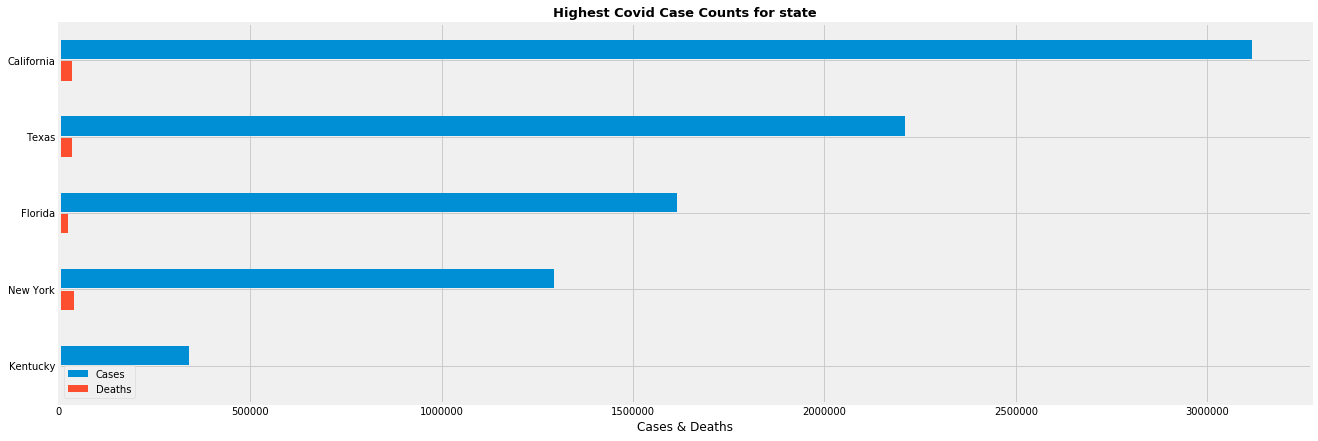

In [16]:
# highest covid cases of 5 states till 21st Jan 2021
plt.figure(figsize=(20, 7))
plt.barh(np.arange(5)+0.14, cases_by_state_df['cases'].iloc[::-1], height=0.25)
plt.barh(np.arange(5)-0.14, cases_by_state_df['deaths'].iloc[::-1], height=0.25)
plt.yticks(np.arange(5), cases_by_state_df['state'].iloc[::-1])
plt.xlabel('Cases & Deaths')
plt.legend(['Cases', 'Deaths'])
plt.title('Highest Covid Case Counts for state',fontsize=13,fontweight="bold")
plt.show()

#### Conclude:   
   Based on above graph, highest covid cases are in California and then texas. However, death cases are slighty more  in New York compare to California. 

So, we can say that California's covid cases are highest but California's death cases are less compare to New York's Death cases.
            

In [17]:
# covid cases trend of different states 
import datetime as dt


def state_case_count(state, date):
    value = states_data1['cases'][states_data1['state'] == state][states_data1['date'] == date]
    return 0 if value.empty else value.iloc[0]   

In [18]:
dates = pd.date_range(dt.date(2020, 1, 21), dt.datetime.today()-dt.timedelta(days=2)).tolist()
dates_str = [date.strftime('%Y-%m-%d') for date in dates]

states=['California','New York','Florida','Kentucky','Texas']

major_states_df = pd.DataFrame({'date': dates_str})
for state in states:    
    major_states_df[state] = [state_case_count(state, date) for date in dates_str]

major_states_df.tail()

,date,California,New York,Florida,Kentucky,Texas
363,2021-01-18,3032007,1256228,1579273,331982,2138574
364,2021-01-19,3071119,1268949,1589089,334347,2160456
365,2021-01-20,3090339,1280068,1601003,337788,2188117
366,2021-01-21,3115704,1293976,1613876,341343,2209995
367,2021-01-22,0,0,0,0,0


In [19]:
# droping last row(22nd Jan,2021), we only have data till 21st Jan,2021
major_states_df=major_states_df.drop(367)

In [20]:
major_states_df.tail()

,date,California,New York,Florida,Kentucky,Texas
362,2021-01-17,3006583,1242818,1571271,329816,2127334
363,2021-01-18,3032007,1256228,1579273,331982,2138574
364,2021-01-19,3071119,1268949,1589089,334347,2160456
365,2021-01-20,3090339,1280068,1601003,337788,2188117
366,2021-01-21,3115704,1293976,1613876,341343,2209995


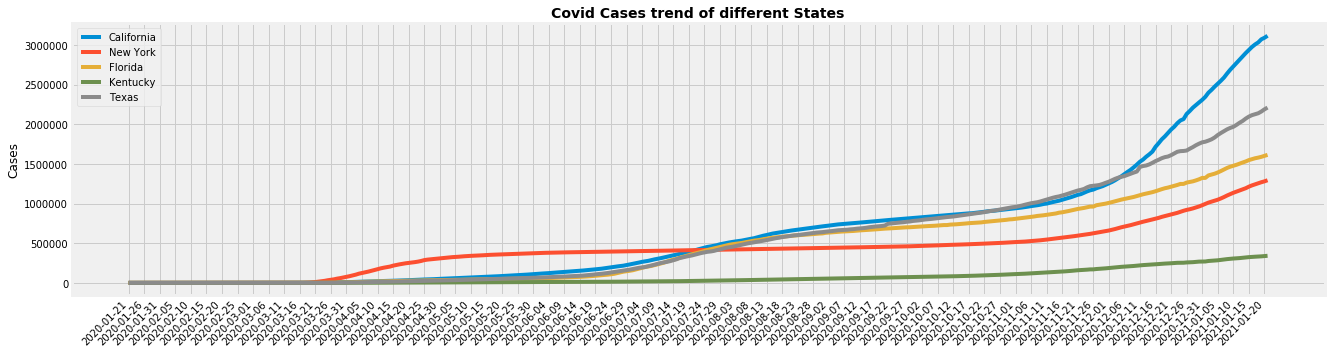

In [21]:
plt.figure(figsize=(20, 5))

for state in states:
    plt.plot(major_states_df['date'], major_states_df[state])
    
plt.xticks(major_states_df['date'][::5], rotation=45, ha='right')
plt.ylabel('Cases')
plt.legend(states)
plt.title('Covid Cases trend of different States',fontsize=14,fontweight="bold")
plt.show()

#### Conclude: 
   Based on the above graph, in New York state, covid cases are firstly occured and then it started increasing gradually till august 2020, and then it decreasing slowly but again at the end of November 2020 and December 2020 it started increasing.

As you can see from blue curve, Highest cases are increasing in california.

When california and New York states have the highest covid cases at that time period, while Kentucky state has very small number of cases at that period. 

So, we can say that kentucky is less affected by covid-19. 

Texas cases are very small till June 2020, and then it increasing gradually, and Currently(Jan 2021), Texas has second Highest covid cases.

Therefore, at the beginning of 2020 year, Texas is less affected by covid but after august 2020, covid cases increasing rapidly.


### California state analysis

In [22]:
# extracting California data from state_data 
state_cases_df = states_data1[states_data1['state'] == 'California'].groupby('date').sum().reset_index()
state_cases_df.tail()

,date,cases,active_cases,deaths
358,2021-01-17,3006583,2972990,33593
359,2021-01-18,3032007,2998265,33742
360,2021-01-19,3071119,3036729,34390
361,2021-01-20,3090339,3055338,35001
362,2021-01-21,3115704,3080003,35701


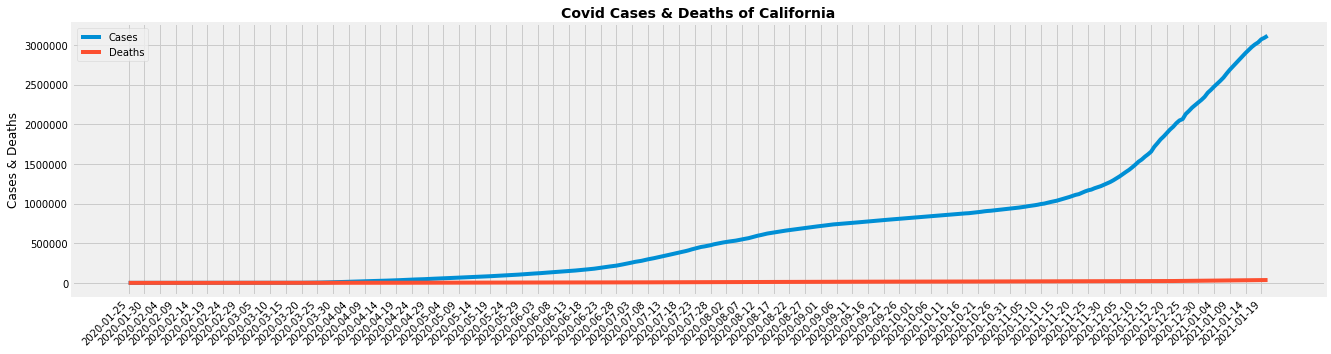

In [23]:
# California cases and deaths from 25-01-2020 to 21-01-2021
plt.figure(figsize=(20, 5))
plt.plot(state_cases_df['date'], state_cases_df['cases'])
plt.plot(state_cases_df['date'], state_cases_df['deaths'])
plt.xticks(state_cases_df['date'][::5], rotation=45, ha='right')
plt.ylabel('Cases & Deaths')
plt.legend(['Cases', 'Deaths'])
plt.title('Covid Cases & Deaths of California',fontsize=14,fontweight="bold")
plt.show()

#### Conclude: 
   California's cases are increasing gradually till october 2020 and during december 2020 (chrismas festival period), it started increasing rapidly.  

### New York state Analysis

In [24]:
state_cases_df = states_data1[states_data1['state'] == 'New York'].groupby('date').sum().reset_index()
state_cases_df.tail()

,date,cases,active_cases,deaths
322,2021-01-17,1242818,1202248,40570
323,2021-01-18,1256228,1215475,40753
324,2021-01-19,1268949,1228016,40933
325,2021-01-20,1280068,1238920,41148
326,2021-01-21,1293976,1252628,41348


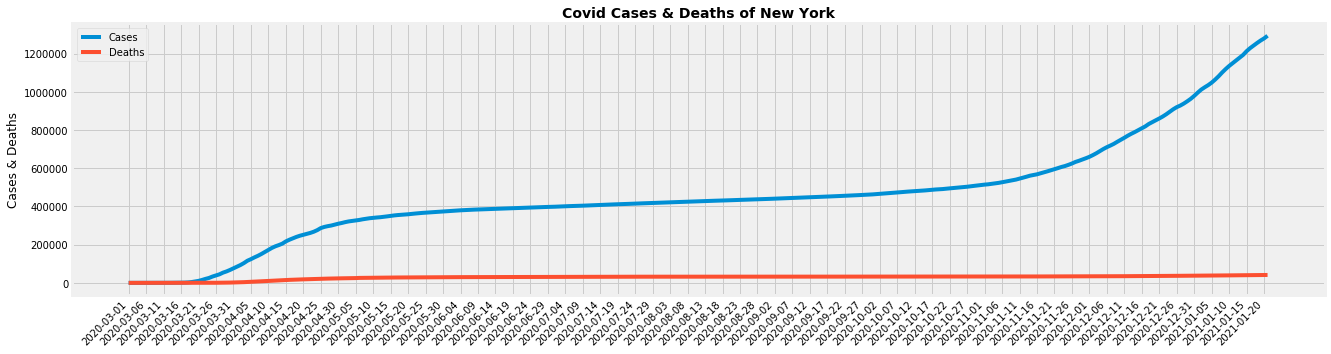

In [25]:
# New York cases and deaths from 01-03-2020 to 20-01-2021
plt.figure(figsize=(20, 5))
plt.plot(state_cases_df['date'], state_cases_df['cases'])
plt.plot(state_cases_df['date'], state_cases_df['deaths'])
plt.xticks(state_cases_df['date'][::5], rotation=45, ha='right')
plt.ylabel('Cases & Deaths')
plt.legend(['Cases', 'Deaths'])
plt.title('Covid Cases & Deaths of New York',fontsize=14,fontweight="bold")
plt.show()

#### Conclude:
   Based on the above curve of New York State, we can see that from March 2020 to May 2020, covid cases increasing and then during few months(June and July) it remains almost same. 

And after that at the end of November 2020, It started increasing. 

### Task-3 Rate Analysis 
Given the above generated data, estimate the following values per state, and generate charts to represent this information.
* Rate of change in active cases
* Mortality rate


#### Mortality rate: 
   It is a measure of number of deaths in a particular population during a specific interval.
##### Formula:
   mortality_rate =  number of death_cases / number of total cases * 100

In [26]:
d1.head()

,date,state,cases,active_cases,deaths
0,2020-01-21,Washington,1,1,0
1,2020-01-22,Washington,1,1,0
2,2020-01-23,Washington,1,1,0
3,2020-01-24,Illinois,1,1,0
4,2020-01-24,Washington,1,1,0


In [27]:
# calculating mortality rate
d1['mortality_rate']=np.round((d1['deaths']/d1['cases'])*100,2)
d1['mortality_rate']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
17884    1.29
17885    1.38
17886    1.64
17887    1.06
17888    1.09
Name: mortality_rate, Length: 17889, dtype: float64

### Analysis of mortality rate of California, New York and Kentucky

In [28]:
# california's mortality rate
california_mortality_rate= d1[d1['state']=='California'].groupby('date').sum().reset_index()

In [29]:
california_mortality_rate.tail()

,date,cases,active_cases,deaths,mortality_rate
358,2021-01-17,3006583,2972990,33593,1.12
359,2021-01-18,3032007,2998265,33742,1.11
360,2021-01-19,3071119,3036729,34390,1.12
361,2021-01-20,3090339,3055338,35001,1.13
362,2021-01-21,3115704,3080003,35701,1.15


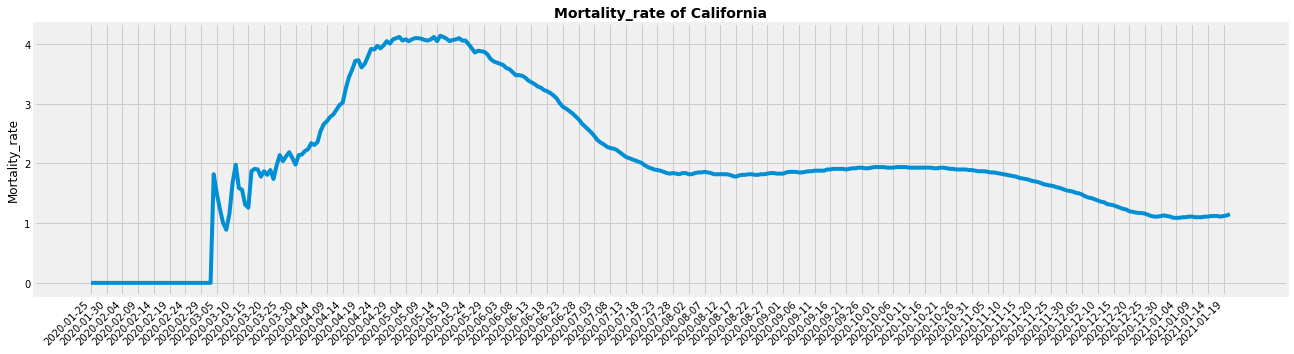

In [30]:
# Mortality rate of California from 01-03-2020 to 20-01-2021
plt.figure(figsize=(20, 5))
plt.plot(california_mortality_rate['date'], california_mortality_rate['mortality_rate'])
plt.xticks(california_mortality_rate['date'][::5], rotation=45, ha='right')
plt.ylabel('Mortality_rate')
plt.title('Mortality_rate of California',fontsize=14,fontweight="bold")
plt.show()

#### Conclude: 
   Based on above graph, we can see that in May 2020, California death rate is highest and then it fluctuating over the time.
   
From Jan 2021 death rate is started decreasing. 

In [31]:
# New York's mortality rate

In [32]:
New_york_mortality_rate= d1[d1['state']=='New York'].groupby('date').sum().reset_index()
New_york_mortality_rate.tail()

,date,cases,active_cases,deaths,mortality_rate
322,2021-01-17,1242818,1202248,40570,3.26
323,2021-01-18,1256228,1215475,40753,3.24
324,2021-01-19,1268949,1228016,40933,3.23
325,2021-01-20,1280068,1238920,41148,3.21
326,2021-01-21,1293976,1252628,41348,3.20


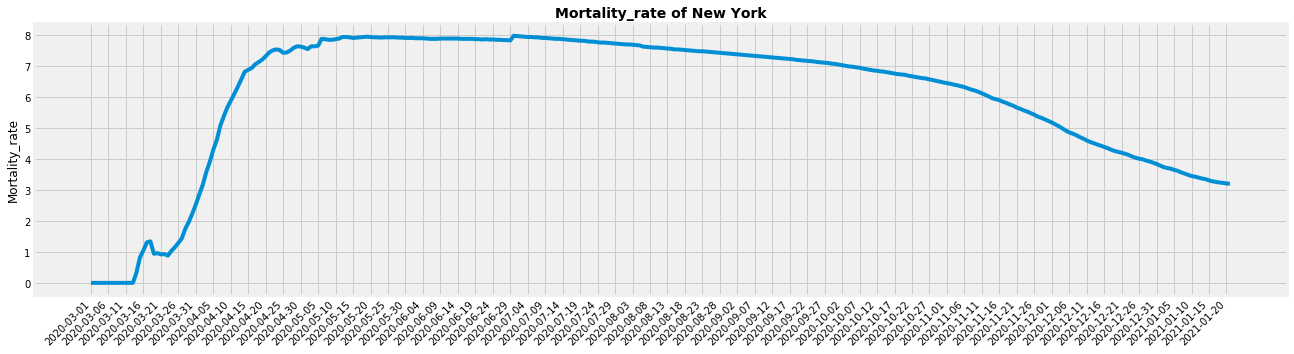

In [33]:
# Mortality rate of New York from 01-03-2020 to 20-01-2021
plt.figure(figsize=(20, 5))
plt.plot(New_york_mortality_rate['date'], New_york_mortality_rate['mortality_rate'])
plt.xticks(New_york_mortality_rate['date'][::5], rotation=45, ha='right')
plt.ylabel('Mortality_rate')
plt.title('Mortality_rate of New York',fontsize=14,fontweight="bold")
plt.show()

#### Conclude: 
  Based on above graph, we can see that New York's death rate is highest in May & June 2020, and then it decreasing over the time.

Hence, we can say that New York death rate is decreasing over the time from the end of June. 

In [34]:
# kentucky's mortality rate

In [35]:
Kentucky_mortality_rate= d1[d1['state']=='Kentucky'].groupby('date').sum().reset_index()
Kentucky_mortality_rate.tail()

,date,cases,active_cases,deaths,mortality_rate
317,2021-01-17,329816,326388,3428,1.04
318,2021-01-18,331982,328520,3462,1.04
319,2021-01-19,334347,330858,3489,1.04
320,2021-01-20,337788,334248,3540,1.05
321,2021-01-21,341343,337759,3584,1.05


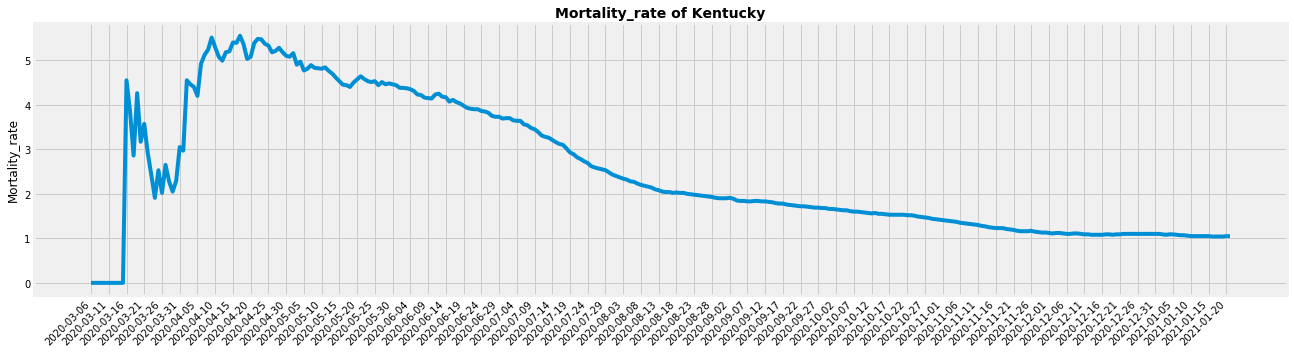

In [36]:
# Mortality rate of kentucky from 06-03-2020 to 21-01-2021
plt.figure(figsize=(20, 5))
plt.plot(Kentucky_mortality_rate['date'], Kentucky_mortality_rate['mortality_rate'])
plt.xticks(Kentucky_mortality_rate['date'][::5], rotation=45, ha='right')
plt.ylabel('Mortality_rate')
plt.title('Mortality_rate of Kentucky',fontsize=14,fontweight="bold")
plt.show()

#### Conclude:
  Based on above graph, we can see that in March & April 2020, Kentucky's death rate is highest and then it decreasing over the time.

Hence, we can say that death rate of Kentucky is decreasing over the time.

### Task-4 Modeling approach and forecast &  Task-5 Result evaluation

task 4: Given your preprocessed dataframe in the previous frame build relevant models, and forecast the rates for the next 15 days. 

task 5: Evaluate your model based on relevant metrics. Visualisations for said comparison would be a good plus.



In [37]:
d1.head(2)

,date,state,cases,active_cases,deaths,mortality_rate
0,2020-01-21,Washington,1,1,0,0.0
1,2020-01-22,Washington,1,1,0,0.0


In [38]:
d1.dtypes

date               object
state              object
cases               int64
active_cases        int64
deaths              int64
mortality_rate    float64
dtype: object

In [39]:
# converting type of date column 
d1['date'] = pd.to_datetime(d1['date'])

In [40]:
# creating a copy of dataset
data = d1.copy()

In [41]:
# droping columns because here we want to predict mortality rate
data.drop(['cases', 'active_cases', 'deaths','state'], axis = 1, inplace = True)

In [42]:
data.head()

,date,mortality_rate
0,2020-01-21,0.0
1,2020-01-22,0.0
2,2020-01-23,0.0
3,2020-01-24,0.0
4,2020-01-24,0.0


In [43]:
# aggregating each date and calculating mean mortality rate of each date
data = data.groupby(['date']).agg('mean')

In [44]:
data.head()

,mortality_rate
date,
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0


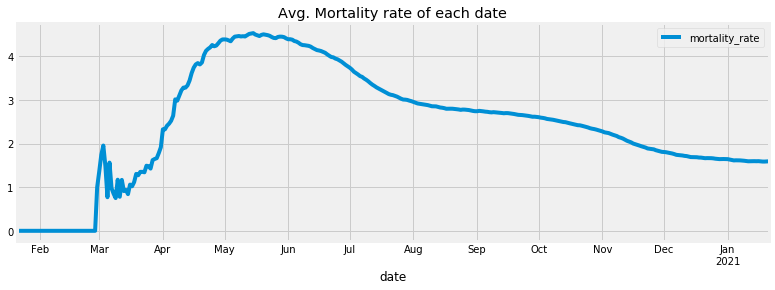

In [45]:
# ploting date wise mortality rate of original dataset
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Avg. Mortality rate of each date')
plt.show(block=False)

### Outlier detection

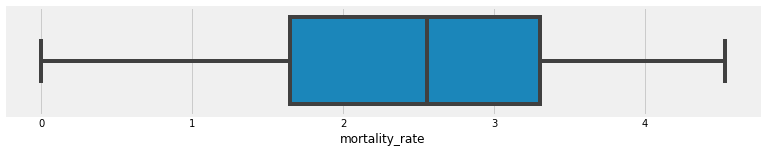

In [46]:
# checking the outliers using Box plot
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['mortality_rate'],whis=1.5)

Based on the above graph,we can see that there is no or less outlier present in this dataset.

### Model Building and evaluating time series forecast


In [47]:
data.shape

(367, 1)

In [48]:
# Spliting time series data into training and test set
train_len = 350
train = data[0:train_len] 
test = data[train_len:] 

### Naive method

Naive method : A naive forecast involves using the previous observation directly as the forecast without any change.

In [49]:
# creating a copy of test data in y_hat_naive
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['mortality_rate'][train_len-1]

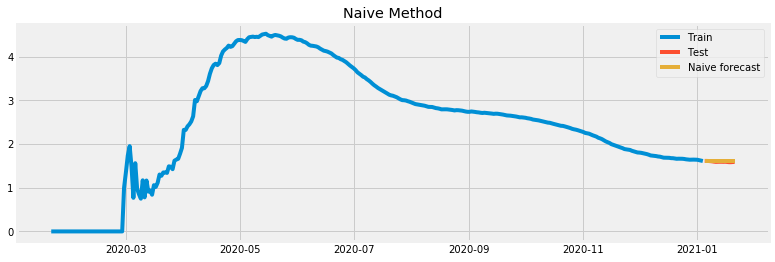

In [50]:
# ploting train, test and forecast of the Naive method
plt.figure(figsize=(12,4))
plt.plot(train['mortality_rate'], label='Train')
plt.plot(test['mortality_rate'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

#### Conclude: 
   Based on above graph, we can see that naive forecast continues the rate value with out any change.
   So, naive method is not relevant for prediction of mortality rate. Because, mortality_rate may be decrease over the time.

In [51]:
### Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['mortality_rate'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['mortality_rate']-y_hat_naive['naive_forecast'])/test['mortality_rate'])*100,2)

naive_result = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
naive_result

,Method,MAPE,RMSE
0,Naive method,0.95,0.02


### Simple average method

Simple average method: It is going to give the average value of all the data. 

In [52]:
# creating a copy of test dataset
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['mortality_rate'].mean()

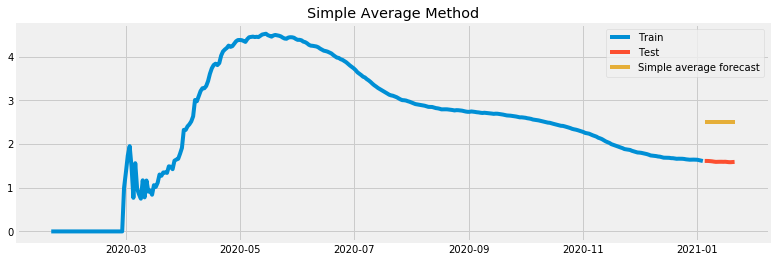

In [53]:
# ploting train, test and forecast of the average method
plt.figure(figsize=(12,4))
plt.plot(train['mortality_rate'], label='Train')
plt.plot(test['mortality_rate'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#### Conclude:
Based on above graph, we can see that, average forecast line is predicting higher mortality rate compare to actual mortality rates.
Because it simply calculate the average value of all the data. But over the time, mortality_rate may be decreasing.
So, this method doesn't give relevant outcome. 

In [54]:
# calculating RMSE and MAPE error
rmse = np.sqrt(mean_squared_error(test['mortality_rate'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['mortality_rate']-y_hat_avg['avg_forecast'])/test['mortality_rate'])*100,2)

avg_result = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
avg_result

,Method,RMSE,MAPE
0,Simple average method,0.9,56.27


#### Conclude: 
   Simple average method gives highest RMSE error. So, it is not suitable method.

### Simple moving average method


A simple moving average is a calculation used to analyze data points by creating a series of averages of 
different subsets of the full data set.

In [55]:
# creating a copy of data(full dataset)
y_hat_sma = data.copy()
ma_window = 7
y_hat_sma['sma_forecast'] = data['mortality_rate'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

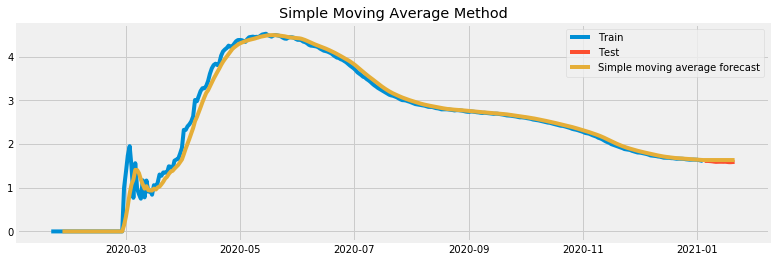

In [56]:
# ploting train, test and forecast of simple moving average method
plt.figure(figsize=(12,4))
plt.plot(train['mortality_rate'], label='Train')
plt.plot(test['mortality_rate'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

#### Conclude: 
   Based on above graph, we can see that moving average method predicted mortality_rate is slighly higher than actual outcome. 

In [57]:
# calculating error
rmse = np.sqrt(mean_squared_error(test['mortality_rate'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['mortality_rate']-y_hat_sma['sma_forecast'][train_len:])/test['mortality_rate'])*100,2)

sm_result = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
sm_result

,Method,RMSE,MAPE
0,Simple moving average forecast,0.04,2.31


### ARIMA method

In [58]:
# train and fitted the ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

In [59]:
# creating a copy test dataset
y_hat_arima = test.copy()
y_hat_arima['arima_forecast'] = model_fit.forecast(len(test))[0]

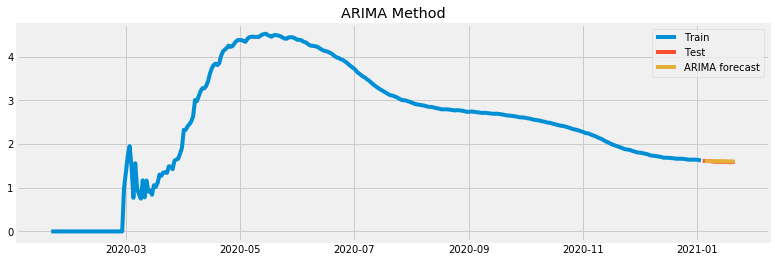

In [60]:
# ploting arima method forecast
plt.figure(figsize=(12,4))
plt.plot( data['mortality_rate'][:train_len-1], label='Train')
plt.plot(data['mortality_rate'][train_len-1:], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [61]:
# calculating RMSE and MAPE error
rmse = np.sqrt(mean_squared_error(test['mortality_rate'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['mortality_rate']-y_hat_arima['arima_forecast'][test.index.min():])/test['mortality_rate'])*100,2)

arima_result = pd.DataFrame({'Method':['ARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
arima_result

,Method,RMSE,MAPE
0,ARIMA method,0.01,0.62


In [62]:
# Comparing error of all the above methods
results = pd.concat([naive_result,avg_result,sm_result,arima_result])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,0.02,0.95
0,Simple average method,0.90,56.27
0,Simple moving average forecast,0.04,2.31
0,ARIMA method,0.01,0.62


#### Conclude: 
   ARIMA method predicts with less error. 

### Mortality rate prediction using ARIMA method

In [63]:
data.head()

,mortality_rate
date,
2020-01-21,0.0
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0


In [64]:
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

In [65]:
prediction_15days = model_fit.forecast(15)[0]

In [66]:
prediction_15days.tolist()[:2]

[1.5968046922108379, 1.6008976269309239]

In [67]:
# here, we have data till 21st Jan 2021
# so, we are going to predict the mortality rate from 22nd Jan, 2021 to 5th Feb, 2021.
# generating next 15 days date series
date_for_15days = pd.Series(pd.period_range("22/1/2021", freq="D", periods=15))
d = { 'date' : date_for_15days, 
     'prediction' : prediction_15days } 
    
# creating a date wise prediction of dataframe
predicted_mortality_rate_df= pd.DataFrame(d)

In [68]:
predicted_mortality_rate_df

,date,prediction
0,2021-01-22,1.596805
1,2021-01-23,1.600898
2,2021-01-24,1.605491
3,2021-01-25,1.609612
4,2021-01-26,1.614178
5,2021-01-27,1.618324
6,2021-01-28,1.622867
7,2021-01-29,1.627036
8,2021-01-30,1.631558
9,2021-01-31,1.635746


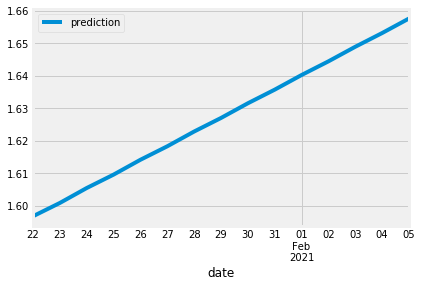

In [69]:
predicted_mortality_rate_df.plot(x='date',y='prediction')


### Task-6 Conclusion
Conclude your findings for this exercise. Include observations, inferences, and visualisations (if any).



#### Conclusion:
   Based on the above charts, we can see that, Highest covid cases are in California and highest death cases are in New York state.
   
And mortality rate is predicted based on date and ARIMA method predicts mortality rate with less error. 

So, we predicted mortality_rate for next 15 days using ARIMA method and it predicts that for next 15 days mortality_rate will be slighly increase(0.01 rate) which means it will remain almost same. 
There will be no or less change of mortality_rate for next 15 days.